In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

In [4]:
df = pd.read_csv('csv-files/wind-turbine.csv')
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

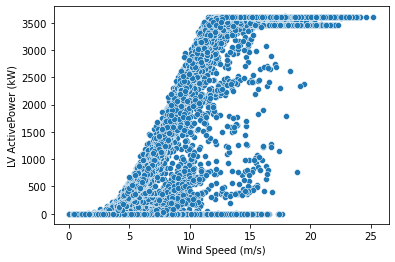

In [6]:
sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)')

<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='Theoretical_Power_Curve (KWh)'>

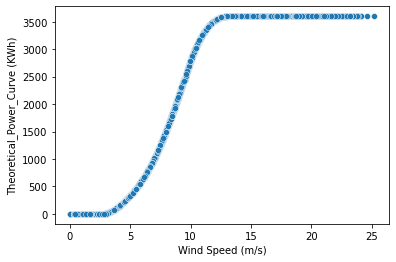

In [8]:
sns.scatterplot(data=df, x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)')

In [9]:
potencia_real = df['LV ActivePower (kW)'].tolist()
potencia_teorica = df['Theoretical_Power_Curve (KWh)'].tolist()

potencia_max = []
potencia_min = []

for potencia in potencia_teorica:
    potencia_max.append(potencia * 1.05)
    potencia_min.append(potencia * 0.95)

In [11]:
dentro_limite = []

for p, potencia in enumerate(potencia_real):
    if potencia >= potencia_min[p] and potencia <= potencia_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

In [13]:
df['DentroLimite'] = dentro_limite
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),DentroLimite
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Fora
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Fora
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Fora
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Fora
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Fora
...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,Fora
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,Fora
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,Fora
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,Dentro


<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

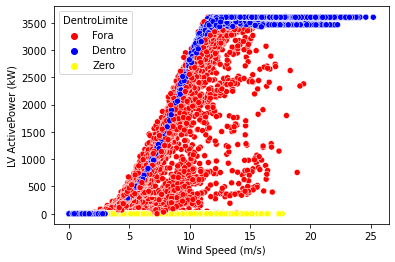

In [16]:
colors = {
    'Dentro' : 'blue',
    'Fora' : 'red',
    'Zero' : 'yellow'
}
sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)', hue='DentroLimite', palette=colors)